# Instacart EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

color = sns.color_palette()

#importing data sets
orders = pd.read_csv('../instacart_2017_05_01/orders.csv')
products = pd.read_csv('../instacart_2017_05_01/products.csv')
departments = pd.read_csv('../instacart_2017_05_01/departments.csv')
train = pd.read_csv('../instacart_2017_05_01/order_products__train.csv')
prior = pd.read_csv('../instacart_2017_05_01/order_products__prior.csv')
aisles = pd.read_csv ('../instacart_2017_05_01/aisles.csv')

In [3]:
#merge datasets into dataframe to see all data
order_products_prior_df = pd.DataFrame(prior)

products_df1 = pd.DataFrame(products)
orders_df2 = pd.DataFrame(orders)
dept_df3 = pd.DataFrame(departments)

orders_products_train_df3 = pd.DataFrame(train)
df4 = pd.merge(products_df1, orders_products_train_df3)
df5 = pd.merge(df4, orders_df2)
df7 = pd.merge(df5, dept_df3)
df6 = pd.merge(df7, aisles)
products.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id'], dtype='object')

In [3]:
amt_of_orders = orders_df2.loc[:, 'user_id'].value_counts().sort_index()
amt_of_orders = pd.DataFrame(df6.user_id.value_counts().reset_index())
amt_of_orders.columns = ['user_id', 'order_count']
merged_df6 = pd.merge(df6, amt_of_orders)
merged_df6

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle,order_count
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,1540,train,29,1,1,8.0,snacks,cookies cakes,20
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,1540,train,29,1,1,8.0,snacks,cookies cakes,20
2,10310,Wheat Thins Original,78,19,6695,20,1,1540,train,29,1,1,8.0,snacks,crackers,20
3,11266,Dried Mangos,117,19,6695,12,1,1540,train,29,1,1,8.0,snacks,nuts seeds dried fruit,20
4,17976,Dry Roasted Macadamias with Sea Salt,117,19,6695,2,1,1540,train,29,1,1,8.0,snacks,nuts seeds dried fruit,20
5,37600,Organic Kettle Corn,23,19,6695,1,1,1540,train,29,1,1,8.0,snacks,popcorn jerky,20
6,37710,Trail Mix,125,19,6695,3,1,1540,train,29,1,1,8.0,snacks,trail mix snack mix,20
7,39657,Milk Chocolate Almonds,45,19,6695,4,1,1540,train,29,1,1,8.0,snacks,candy chocolate,20
8,45051,Pub Mix,107,19,6695,6,1,1540,train,29,1,1,8.0,snacks,chips pretzels,20
9,130,Vanilla Milk Chocolate Almond Ice Cream Bars M...,37,1,6695,14,1,1540,train,29,1,1,8.0,frozen,ice cream ice,20


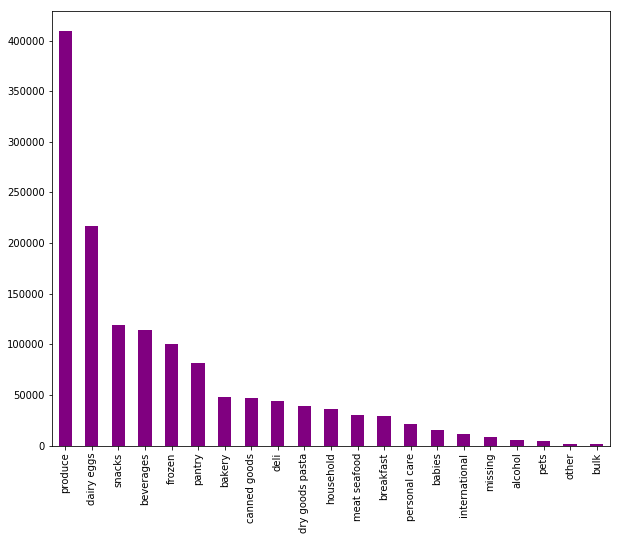

In [4]:
df6.loc[:, 'department'].value_counts().head(30).plot(kind='bar', color='purple', figsize=(10,8))

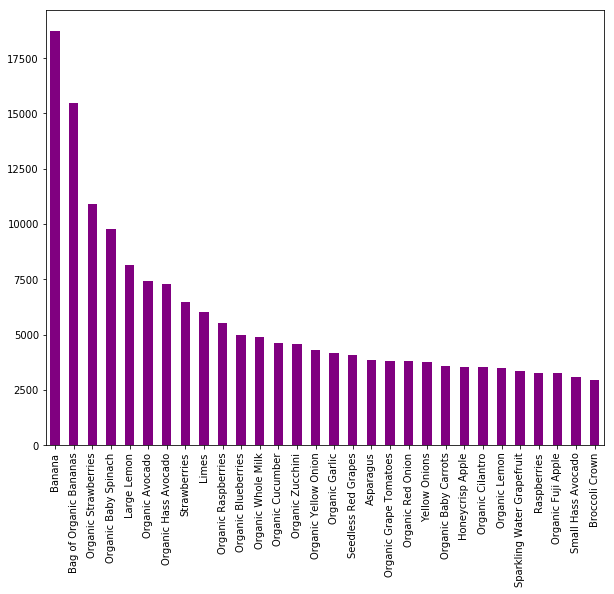

In [5]:
#list of all products and how many times they were ordered
df6.loc[:, 'product_name'].value_counts().head(30).plot(kind='bar', color='purple', figsize=(10,8))

In [6]:
#Product Frequency
product_freq = df6['product_name'].value_counts().reset_index().head(30)
product_freq.columns = ['product_name', 'order_count']
product_freq

,product_name,order_count
0,Banana,18726
1,Bag of Organic Bananas,15480
2,Organic Strawberries,10894
3,Organic Baby Spinach,9784
4,Large Lemon,8135
5,Organic Avocado,7409
6,Organic Hass Avocado,7293
7,Strawberries,6494
8,Limes,6033
9,Organic Raspberries,5546


In [7]:
prod_list = df6["product_name"].tolist()

organic_list = [s for s in prod_list if "Organic" in s]
organic_df = pd.DataFrame({'product_name': organic_list})
organic_df

,product_name
0,Organic Chocolate Super Cookies
1,Organic Lemon Pie Coco Roons
2,Organic Letter of the Day Very Vanilla Cookies
3,Organic Lemon Pie Sprouted Cookies
4,Organic Lemon Pie Coco Roons
5,Organic Maple Stroopwafels Cookies
6,Organic Maple Stroopwafels Cookies
7,Organic Chocolate Super Cookies
8,Organic Chocolate Super Cookies
9,Organic Letter of the Day Very Vanilla Cookies


In [8]:
organic_df = organic_df['product_name'].value_counts().sort_index().head(30)
organic_df.columns = ['product_name', 'order_count']
organic_df

0% Fat Free Organic Milk                                185
0% Fat Organic Greek Vanilla Yogurt                      65
1% Lowfat Organic Milk                                    6
100% Grass-Fed Organic Plain Creamline Yogurt            19
100% Juice, Organic, Pomegranate                          1
100% Lactose Free Organic 2% Reduced Fat Milk            87
100% Organic All-Natural Dried Jackfruit                  1
100% Organic All-Natural Dried Pineapple                  5
100% Organic Cannellini Beans                             4
100% Organic Cayenne Pepper                               1
100% Organic Chickpeas                                   12
100% Organic Coconut Water                                2
100% Organic Crushed Chili                                2
100% Organic Diced Tomatoes                              42
100% Organic Einkorn  All-Purpose Flour                   4
100% Organic Einkorn Whole Wheat Pasta                    3
100% Organic Hemp Seed Oil              

In [9]:
non_organic_list = [s for s in prod_list if "Organic" not in s]
non_organic_df = pd.DataFrame({'non_organic_name': non_organic_list})
non_organic_df

,non_organic_name
0,Chocolate Sandwich Cookies
1,Chocolate Chip Cookies
2,Chocolate Sandwich Cookies
3,Chocolate Sandwich Cookies
4,Chocolate Sandwich Cookies
5,Chocolate Sandwich Cookies
6,Chocolate Sandwich Cookies
7,Chocolate Sandwich Cookies
8,Oatmeal Raisin Cookies
9,Chocolate Sandwich Cookies


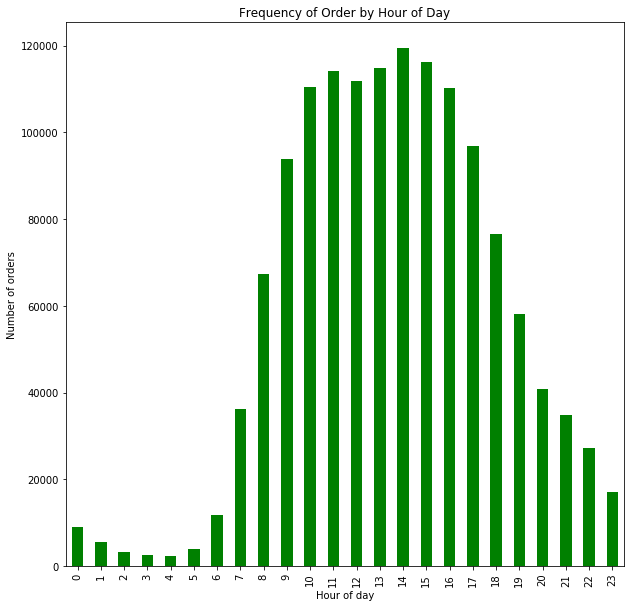

In [10]:
merged_df6.loc[:, 'order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='green', figsize=(10,10));
plt.xlabel('Hour of day');
plt.ylabel('Number of orders');
plt.title('Frequency of Order by Hour of Day');

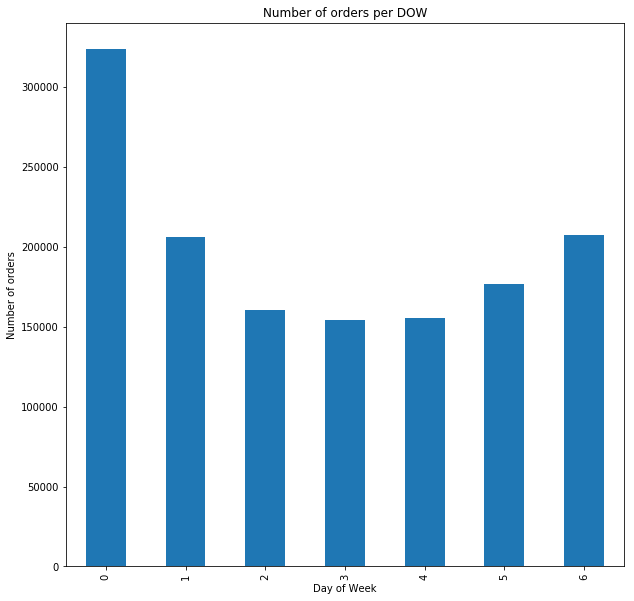

In [11]:
merged_df6.loc[:, 'order_dow'].value_counts().sort_index().plot(kind='bar', figsize=(10,10));
plt.xlabel('Day of Week');
plt.ylabel('Number of orders');
plt.title('Number of orders per DOW');

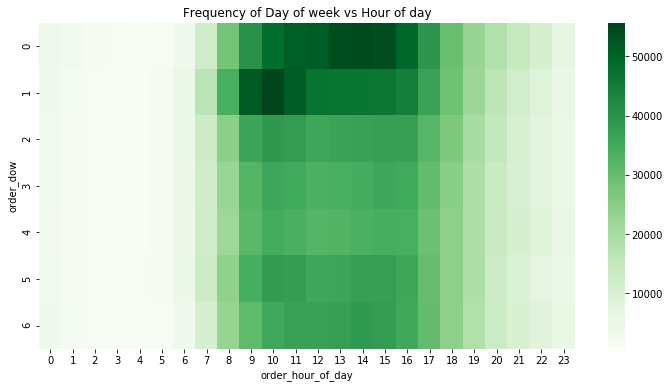

In [12]:
hour_dow_df = orders_df2.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
hour_dow_df = hour_dow_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(hour_dow_df, cmap="Greens")
plt.title("Frequency of Day of week vs Hour of day")
plt.show()

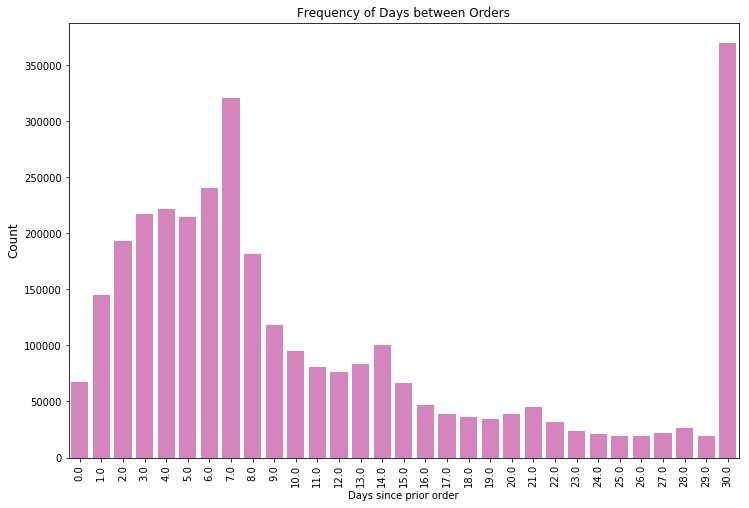

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df2, color=color[6])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=10)
plt.xticks(rotation='vertical')
plt.title("Frequency of Days between Orders", fontsize=12)
plt.show()

In [14]:
# percentage of re-orders in prior set
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [15]:
orders_products_train_df3.reordered.sum() / orders_products_train_df3.shape[0]

0.5985944127509629

In [16]:
merged_df6 = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
merged_df6["reordered"].loc[merged_df6["reordered"]>1] = 1
merged_df6.reordered.value_counts() / merged_df6.shape[0]

1    0.879151
0    0.120849
Name: reordered, dtype: float64

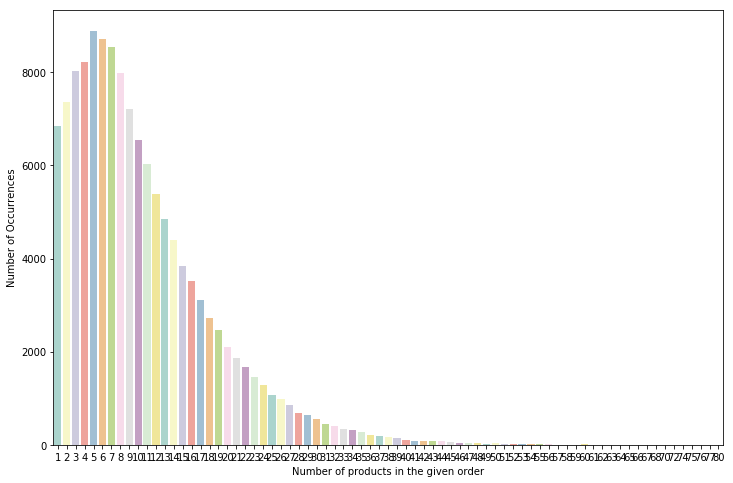

In [17]:
merged_df6 = orders_products_train_df3.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
prod_in_order = merged_df6.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(prod_in_order.index, prod_in_order.values, alpha=0.8, palette="Set3")
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xlabel('Number of products in the given order', fontsize=10)
plt.show()

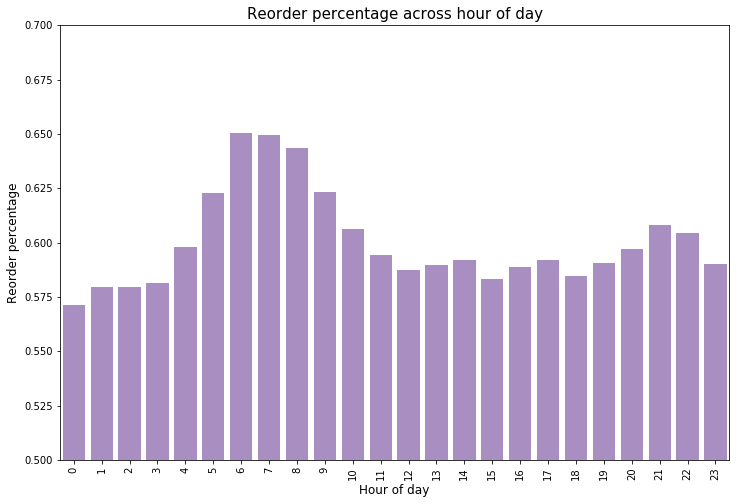

In [18]:
grouped_df = df6.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_hour_of_day'].values, grouped_df['reordered'].values, alpha=0.8, color=color[4])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder percentage across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

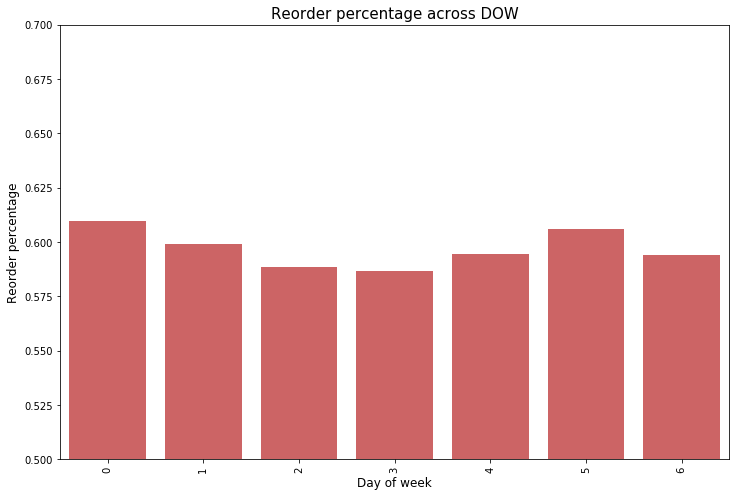

In [19]:
grouped_df = df6.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(grouped_df['order_dow'].values, grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder percentage across DOW", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

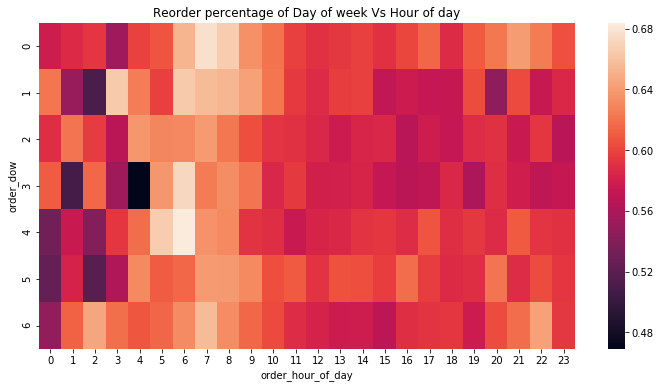

In [20]:
grouped_df = df6.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder percentage of Day of week Vs Hour of day")
plt.show()

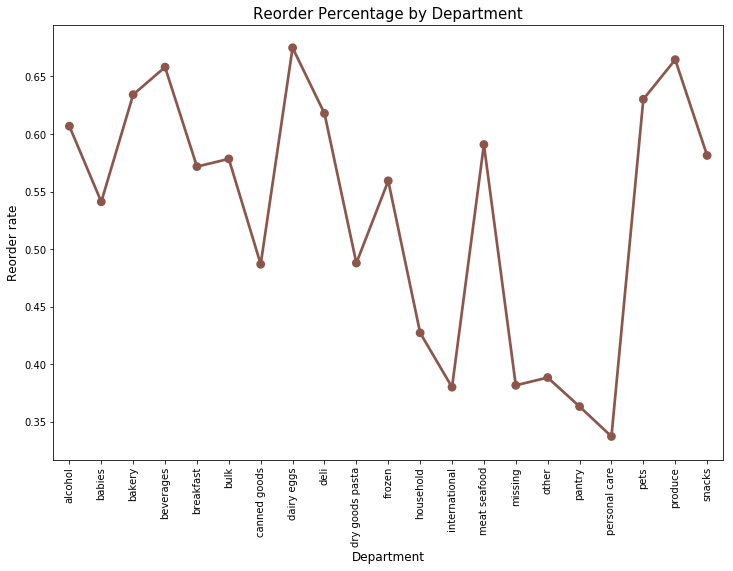

In [21]:
grouped_df = df6.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[5])
plt.ylabel('Reorder rate', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Reorder Percentage by Department", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


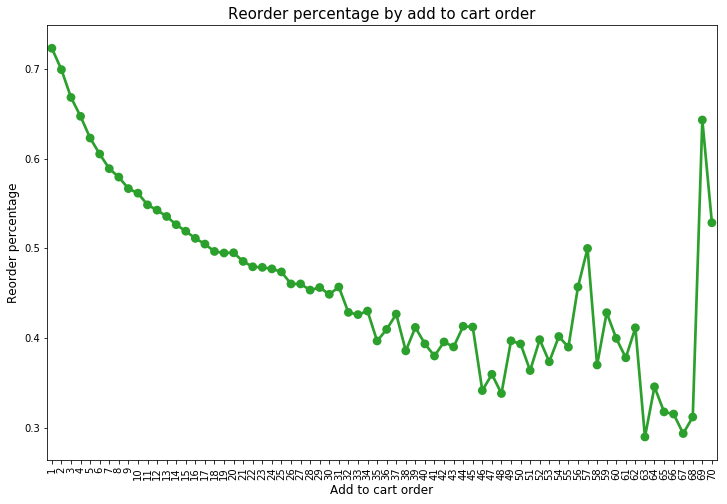

In [22]:
df6["add_to_cart_order_mod"] = df6["add_to_cart_order"].copy()
df6["add_to_cart_order_mod"].loc[df6["add_to_cart_order_mod"]>70] = 70
grouped_df = df6.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['add_to_cart_order_mod'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder percentage', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Reorder percentage by add to cart order", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

Goal: Predict the Probability of a product being re-ordered.
Model: Logistic Regression Model to predict the probability of the product being re-ordered according to the products characteristics [aisle, department, organic/non-organic]


# Logistic Regression Model

In [23]:
df6.head()

,product_id,product_name,aisle_id,department_id,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle,add_to_cart_order_mod
0,1,Chocolate Sandwich Cookies,61,19,6695,7,1,1540,train,29,1,1,8.0,snacks,cookies cakes,7
1,40199,Chocolate Chip Cookies,61,19,6695,17,1,1540,train,29,1,1,8.0,snacks,cookies cakes,17
2,1,Chocolate Sandwich Cookies,61,19,48361,9,0,194636,train,5,2,14,11.0,snacks,cookies cakes,9
3,1,Chocolate Sandwich Cookies,61,19,63770,4,0,751,train,7,2,6,30.0,snacks,cookies cakes,4
4,1,Chocolate Sandwich Cookies,61,19,75339,9,0,142585,train,6,1,13,30.0,snacks,cookies cakes,9


In [ ]:
#target is reordered or not

In [ ]:
df6['reordered'].value_counts()

In [ ]:
features = ['aisle','product_name','add_to_cart_order','department','order_dow',
            'order_hour_of_day','reordered']

for feat in features:
    if feat != 'aisle':
        print(df6[feat].value_counts())

In [5]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [ ]:
df6_md1 = pd.get_dummies(df6[['aisle','department','product_name','add_to_cart_order'
                              'reordered']], drop_first = True)

df6

LogReg1 = LogisticRegression()

X1 = df6_md1.drop('reordered', axis =1)
y1 = df6_md1['reordered']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,y1, random_state =42)

LogReg1.fit(x_train1, y_train1)

In [ ]:
name = df6_md1.columns.drop('reordered')

coef = LogReg1.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

In [ ]:
y_pred = LogReg1.predict(x_test1)

In [ ]:
metrics.accuracy_score(y_test1,y_pred)

In [ ]:
metrics.confusion_matrix(y_test1,y_pred)